In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('C:/Users/admin/Desktop/final_data_2013.csv')

In [3]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [4]:
df.columns

Index(['normalized_name', 'success', 'funding_rounds', 'funding_total_usd',
       'milestones', 'relationships', 'PopulationEstimate-2013',
       'PopulationGrowth ', 'private_eq', 'crowd_eq', 'Round_1_amount',
       'Round_2_amount', 'Round_3_amount', 'Round_4_amount', 'Round_5_amount',
       'Round_6_amount', 'Venture_Capital', 'investor_participants',
       'FounderCounter', 'C_Level_Counter', 'school_counter', 'count_degrees',
       'dropout_fg', 'female_fg', 'MBA_fg', 'state_ranked',
       'city_ranked_other_city', 'city_ranked_top_five_city',
       'city_ranked_top_ten_city', 'round1_fg', 'round2_fg', 'round3_fg',
       'round4_fg', 'round5_fg', 'round6_fg', 'venture_capital_fg',
       'private_eq_fg', 'crowd_eq_fg', 'round1_missing_fg',
       'round2_missing_fg', 'round3_missing_fg', 'round4_missing_fg',
       'round5_missing_fg', 'software', 'biotech', 'enterprise', 'web',
       'mobile', 'advertising', 'ecommerce', 'analytics', 'games_video',
       'cleantech', '

In [5]:
array = df.values

In [6]:
X = array[:,2:]

In [7]:
X[0]

array([3, 39750000, 5, 17.0, 654224.0, 0.07137605, 0, 0, 0, 5250000,
       9500000, 25000000, 0, 0, 0, 4.0, 5.0, 3.0, 1.0, 4.0, 1.0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 8.210958904, 4841091.091, 4243], dtype=object)

In [8]:
Y = array[:,1]

In [9]:
Y=Y.astype('int')

In [10]:
test_size = 0.25
seed = 42

In [11]:
# select 1/5 randomly and split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= test_size, random_state= seed)

In [12]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (10603, 55)
Training Labels Shape: (10603,)
Testing Features Shape: (3535, 55)
Testing Labels Shape: (3535,)


In [13]:
minmaxScaler = preprocessing.MinMaxScaler()

In [14]:
# standardize
minmaxScaler.fit(X_train)
rescaledX_train = minmaxScaler.transform(X_train)

# Default RandomForest

In [15]:
rf = RandomForestClassifier(random_state = 63)
# Train the model on training data
rf.fit(rescaledX_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=63, verbose=0,
                       warm_start=False)

In [16]:
X_test_min_max = minmaxScaler.transform(X_test)

In [17]:
pred = rf.predict(X_test_min_max)

In [18]:
pred

array([1, 0, 0, ..., 0, 0, 0])

In [19]:
accuracy_score(Y_test, pred)

0.7671852899575672

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test, pred))

[[2571  137]
 [ 686  141]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      2708
           1       0.51      0.17      0.26       827

    accuracy                           0.77      3535
   macro avg       0.65      0.56      0.56      3535
weighted avg       0.72      0.77      0.72      3535



In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [23]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]
lr_probs = rf.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

In [24]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.604


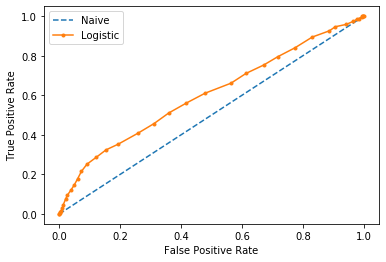

In [25]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Naive')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [26]:
import shap
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [27]:
column_name = list(df.columns) 
columns = column_name[2:]

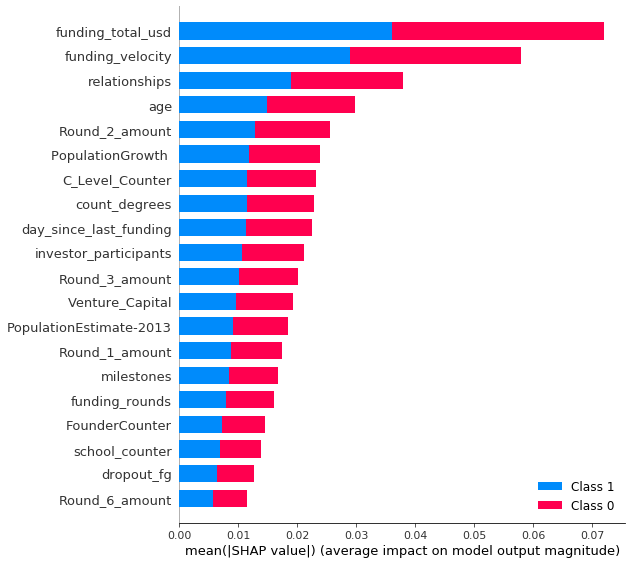

In [28]:
explainer1 = shap.TreeExplainer(rf)
shap_values = explainer1.shap_values(rescaledX_train)
shap.summary_plot(shap_values, features=rescaledX_train, feature_names=columns)

# GridSearchCV

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [92]:
# scoring
scoring = "neg_mean_squared_error"
num_folds = 10
kfold = KFold(n_splits = num_folds, random_state = seed)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [93]:
param_grid = {
    'n_estimators': [10,25,50],
    'max_depth': [2,5,10,15],
    'max_features': [4,8,12],
    'min_samples_split':[3,4,5],
}

In [94]:
model= RandomForestClassifier()

In [95]:
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring= scoring, cv= kfold)

In [96]:
grid_result = grid.fit(rescaledX_train, Y_train)

In [97]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.270269 using {'max_depth': 5, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 10}


In [98]:
# all
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" % (mean, stdev, param))

-0.278187 (0.019478) with {'max_depth': 2, 'max_features': 4, 'min_samples_split': 3, 'n_estimators': 10}
-0.281918 (0.019159) with {'max_depth': 2, 'max_features': 4, 'min_samples_split': 3, 'n_estimators': 25}
-0.280518 (0.020452) with {'max_depth': 2, 'max_features': 4, 'min_samples_split': 3, 'n_estimators': 50}
-0.278425 (0.017147) with {'max_depth': 2, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 10}
-0.280520 (0.019608) with {'max_depth': 2, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 25}
-0.280985 (0.018658) with {'max_depth': 2, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 50}
-0.277723 (0.020663) with {'max_depth': 2, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 10}
-0.280519 (0.020361) with {'max_depth': 2, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 25}
-0.278888 (0.018733) with {'max_depth': 2, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 50}
-0.277490 (0.021995) with {'max_depth': 2, 'ma

In [108]:
# new model
rf1 = RandomForestClassifier(max_depth = 5, max_features = 4, n_estimators = 10, random_state = 63, min_samples_split = 4)
# Train the model on training data
rf1.fit(rescaledX_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=63, verbose=0,
                       warm_start=False)

In [109]:
pred1 = rf1.predict(X_test_min_max)

In [110]:
accuracy_score(Y_test, pred1)

0.6843575418994413

In [111]:
print(confusion_matrix(Y_test,pred1))
print(classification_report(Y_test, pred1))

[[694  44]
 [295  41]]
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       738
           1       0.48      0.12      0.19       336

    accuracy                           0.68      1074
   macro avg       0.59      0.53      0.50      1074
weighted avg       0.63      0.68      0.61      1074



# RandomizedSearchCV  

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
param = {
    'n_estimators': [10,25,50,100,150],
    'max_depth': [2,5,10,15,20],
    'max_features': [4,8,12,16,20],
    'min_samples_split':[2,3,4,5,6],
    'min_samples_leaf':[1,2,3,4,5],
}

In [33]:
model= RandomForestClassifier()
clf = RandomizedSearchCV(model, param, random_state=63, n_iter=50)
search = clf.fit(rescaledX_train, Y_train)
search.best_params_

{'n_estimators': 25,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 4,
 'max_depth': 10}

In [ ]:
# up to now best
#rf2 = RandomForestClassifier(max_depth = 5, max_features = 20, n_estimators = 150, random_state = 63, min_samples_split = 6, min_samples_leaf = 2)

In [34]:
rf2 = RandomForestClassifier(max_depth = 10, max_features = 4, n_estimators = 150, random_state = 63, min_samples_split = 5, min_samples_leaf = 2)
rf2.fit(rescaledX_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=63, verbose=0,
                       warm_start=False)

In [35]:
pred2 = rf2.predict(X_test_min_max)

In [36]:
accuracy_score(Y_test, pred2)

0.7789086796720385

In [37]:
print(confusion_matrix(Y_test,pred2))
print(classification_report(Y_test, pred2))

[[2634   93]
 [ 689  121]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2727
           1       0.57      0.15      0.24       810

    accuracy                           0.78      3537
   macro avg       0.68      0.56      0.55      3537
weighted avg       0.74      0.78      0.73      3537



In [75]:
f1_score(Y_test, pred2)

0.29268292682926833

In [76]:
f1_score(Y_test, pred2, average = "weighted")

0.6850025947067981

In [77]:
f1_score(Y_test, pred2, average = "macro")

0.5635703165542294

In [78]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]
lr_probs = rf2.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

In [79]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.574


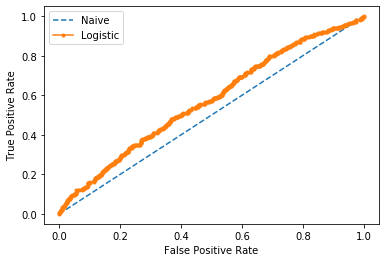

In [80]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Naive')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

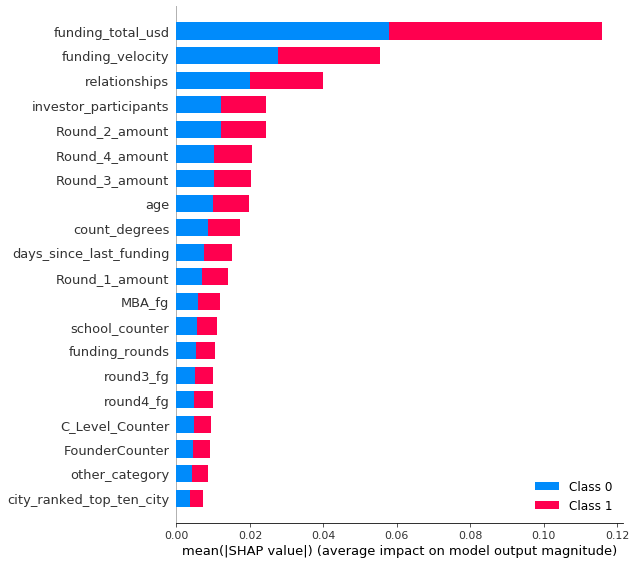

In [111]:
explainer = shap.TreeExplainer(rf2)
shap_values = explainer.shap_values(rescaledX_train)
shap.summary_plot(shap_values, features=rescaledX_train, feature_names=columns)